In [1]:
library(ggplot2)
library(dplyr)
library(ggpubr)
load("ProcessData.RData")




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




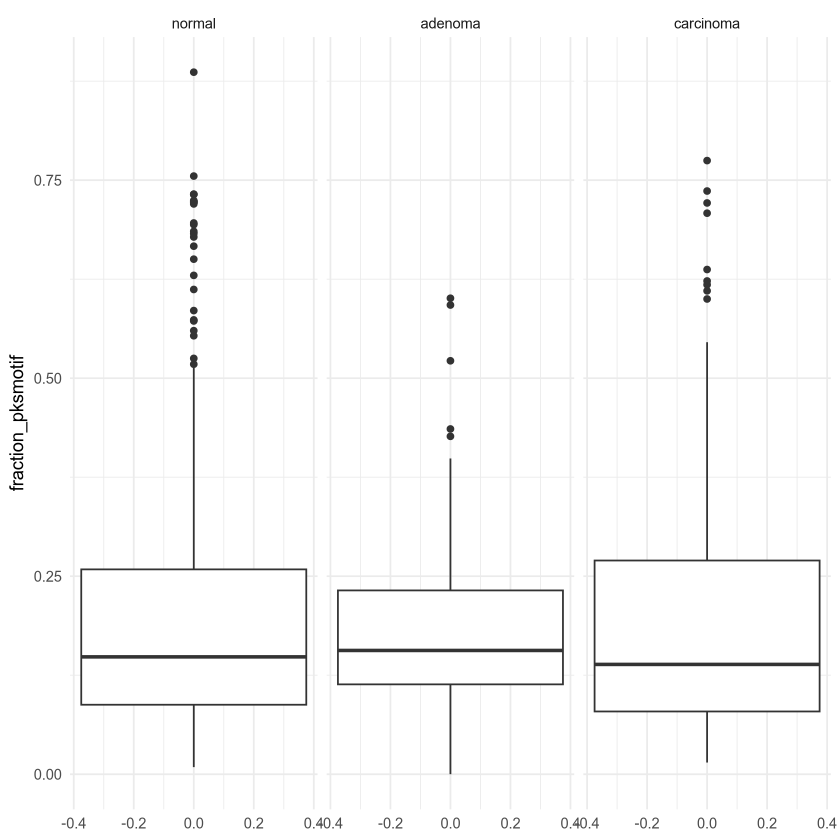

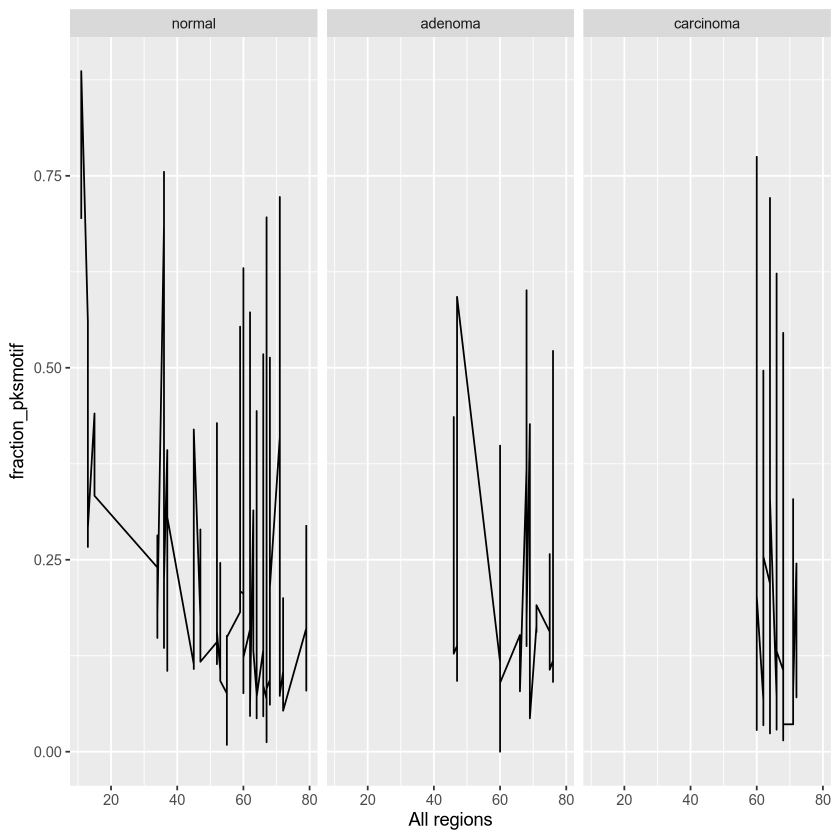

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


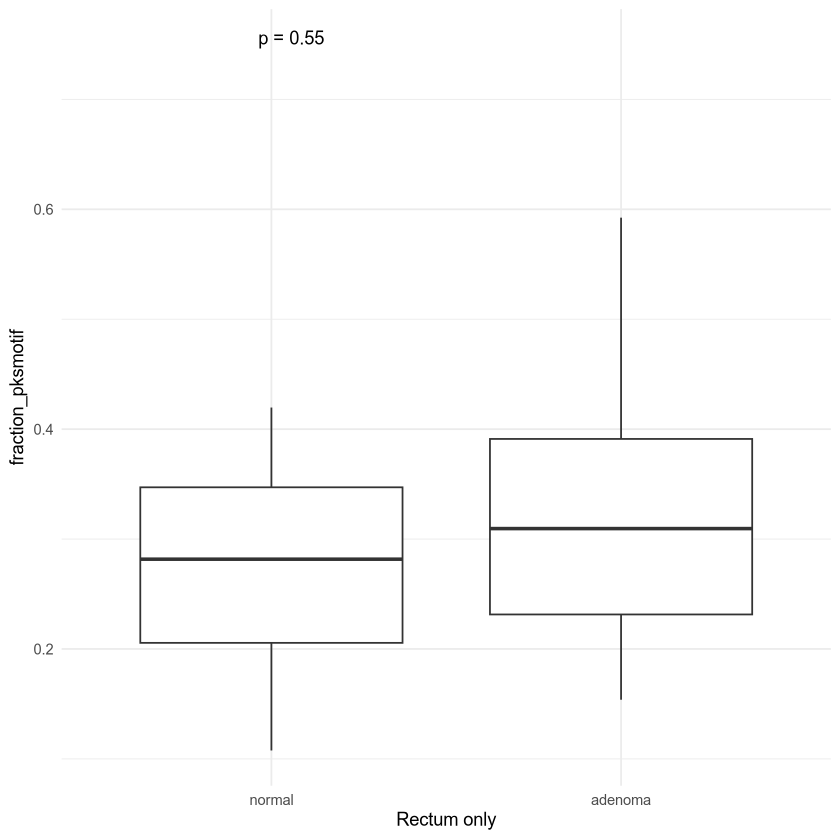

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


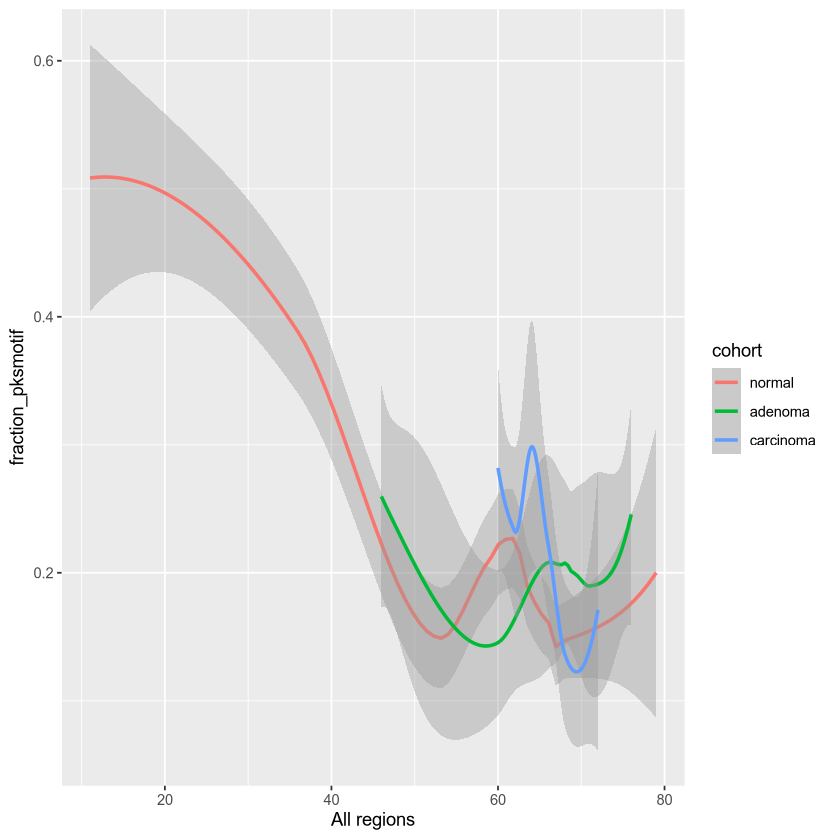

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


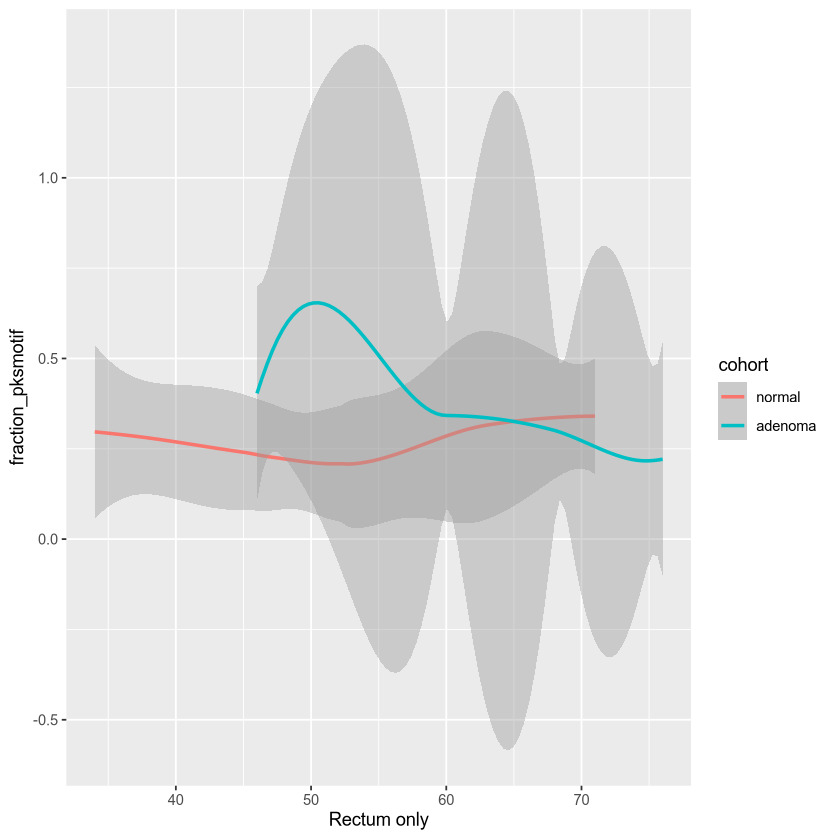

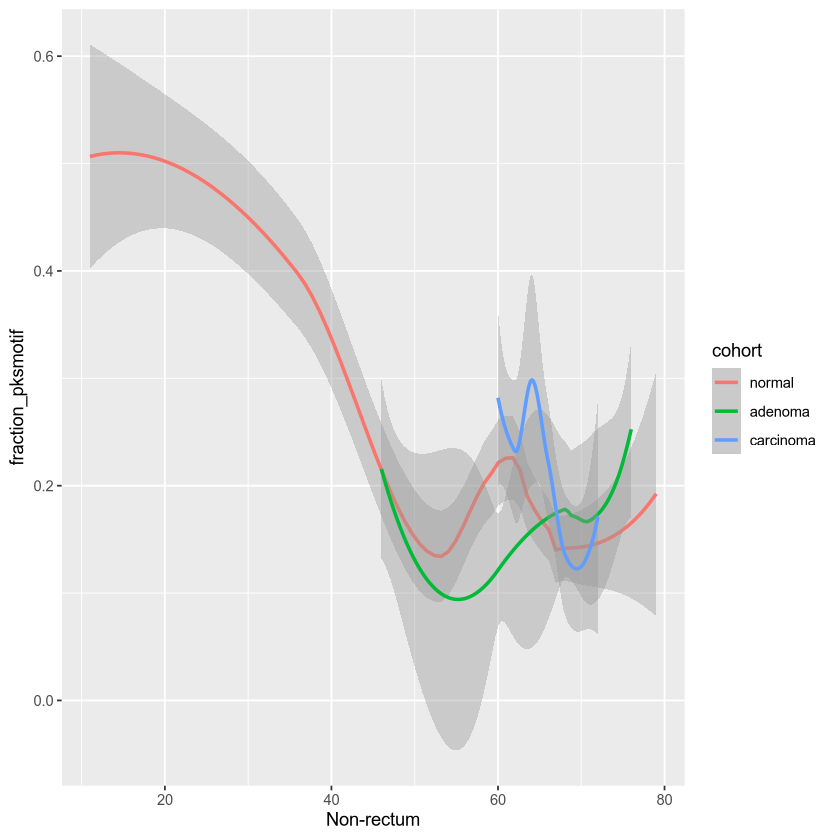

In [6]:
ggplot(combined_df, aes(y=fraction_pksmotif)) +
  geom_boxplot() + facet_wrap(~cohort) + theme_minimal()

ggplot(combined_df, aes(x=age, y=fraction_pksmotif)) +
  geom_line() + facet_wrap(~cohort) + xlab("All regions")

ggplot(subset(combined_df, region == "rectum"), aes(x = cohort, y=fraction_pksmotif)) +
  geom_boxplot() + theme_minimal() + xlab("Rectum only") + stat_compare_means(aes(group = cohort), label = "p.format", label.y = 0.75)

ggplot(subset(combined_df, coverage > 9), aes(x=age, y=fraction_pksmotif, color = cohort)) +
  geom_smooth() + xlab("All regions")

ggplot(subset(combined_df, region == "rectum"), aes(x=age, y=fraction_pksmotif, color = cohort)) +
  geom_smooth() + xlab("Rectum only")

ggplot(subset(combined_df, region != "rectum"), aes(x=age, y=fraction_pksmotif, color = cohort)) +
  geom_smooth() + xlab("Non-rectum")

Figure 4
Colibactin sequences for snvs and IDs
WGS
Coding
Signature refits
Signature corresponding to refit
Age
VAF?

See if in any driver mutations?


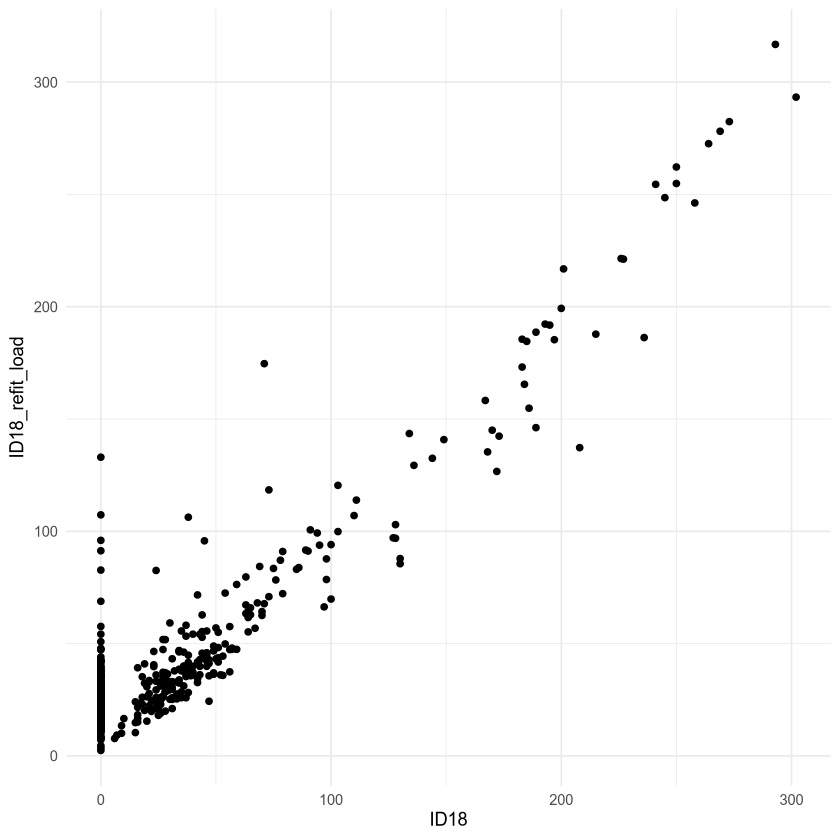

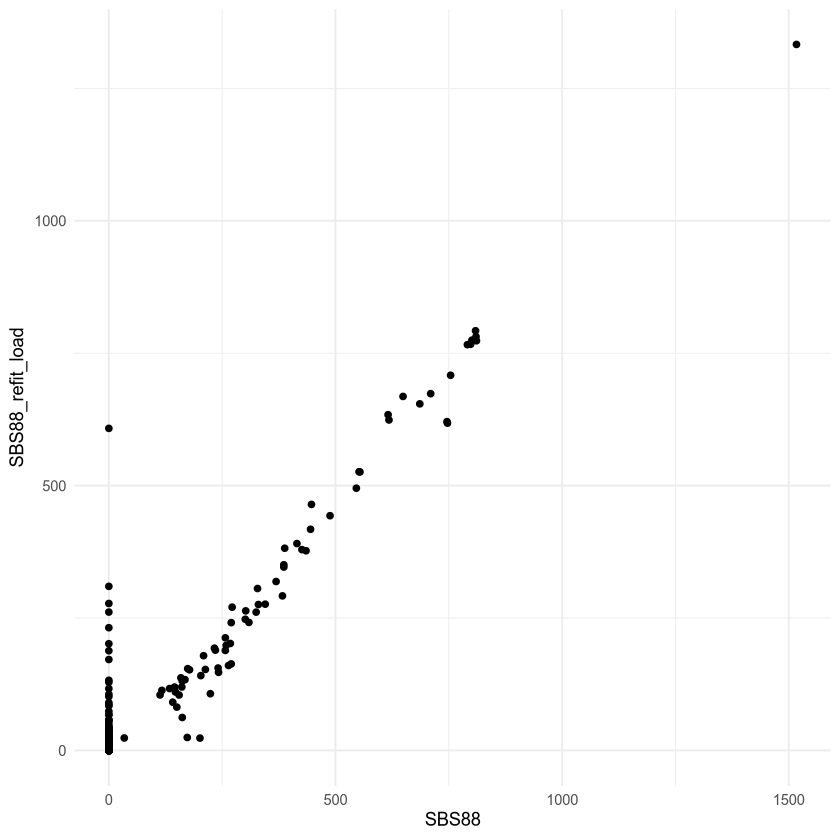

In [7]:
ggplot(combined_df, aes(x=ID18, y=ID18_refit_load)) + geom_point() + theme_minimal()
ggplot(combined_df, aes(x=SBS88, y=SBS88_refit_load)) + geom_point() + theme_minimal()

In [ ]:
metrics <- c(
  "SBS88", "ID18", "ID18_perc", "snv_perc", "fraction_pksmotif",
  "SBS88_refit_load", "ID18_refit_load", "total_indels",
  "SBS88_refit_perc", "ID18_refit_perc", "n_with_driver_gene_coding",
  "fraction_pksmotif_coding", "total_indels_genic","fraction_pksmotif_genic",
  "n_AA_coding","n_with_driver_gene_id","n_with_driver_gene_snv",
  "total_coding_indels","total_indels_genic","n_AA_genic", "n_with_gene_snv",
  "ID18_refit_coding", "SBS88_refit_coding","ID18_refit_genic","SBS88_refit_genic",
  "n_with_coding_snv"
)

In [ ]:
for (m in metrics) {

  test <- cor.test(
    combined_df$age,
    combined_df[[m]],
    method = "spearman",
    use = "complete.obs"
  )

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(x = age, y = .data[[m]])
  ) +
    geom_point(alpha = 0.6, size = 1) +
    geom_smooth(method = "loess", se = FALSE) +
    theme_bw() +
    labs(
      title = paste0(
        m,
        " vs Age\nSpearman ρ = ",
        round(test$estimate, 3),
        ", p = ",
        signif(test$p.value, 3)
      ),
      x = "Age",
      y = m
    )

  print(p)
}

for (m in metrics) {

  n_groups <- n_distinct(combined_df$cohort)

  test <- if (n_groups == 2) {
    wilcox.test(
      combined_df[[m]] ~ combined_df$cohort
    )
  } else {
    kruskal.test(
      combined_df[[m]] ~ combined_df$cohort
    )
  }

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(x = cohort, y = .data[[m]])
  ) +
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = 0.2, alpha = 0.4, size = 1) +
    theme_bw() +
    labs(
      title = paste0(
        m,
        " by Cohort\np = ",
        signif(test$p.value, 3)
      ),
      x = "Cohort",
      y = m
    )

  print(p)
}

for (m in metrics) {

  n_groups <- n_distinct(combined_df$region)

  test <- if (n_groups == 2) {
    wilcox.test(
      combined_df[[m]] ~ combined_df$region
    )
  } else {
    kruskal.test(
      combined_df[[m]] ~ combined_df$region
    )
  }

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(x = region, y = .data[[m]])
  ) +
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = 0.2, alpha = 0.4, size = 1) +
    theme_bw() +
    labs(
      title = paste0(
        m,
        " by region\np = ",
        signif(test$p.value, 3)
      ),
      x = "region",
      y = m
    )

  print(p)
}

for (m in metrics) {

  n_groups <- n_distinct(combined_df$side)

  test <- if (n_groups == 2) {
    wilcox.test(
      combined_df[[m]] ~ combined_df$side
    )
  } else {
    kruskal.test(
      combined_df[[m]] ~ combined_df$side
    )
  }

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(x = side, y = .data[[m]])
  ) +
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = 0.2, alpha = 0.4, size = 1) +
    theme_bw() +
    labs(
      title = paste0(
        m,
        " by side\np = ",
        signif(test$p.value, 3)
      ),
      x = "side",
      y = m
    )

  print(p)
}
combined_df <- combined_df %>%
  mutate(
    region_tri = case_when(
      region %in% c("Right", "cecum", "asc_col") ~ "RIGHT",
      region == "trans_col" ~ "trans_col",
      TRUE ~ "LEFT"
    ),
    region_tri = factor(
      region_tri,
      levels = c("RIGHT", "trans_col", "LEFT")
    )
  )




In [ ]:
for (m in metrics) {

  p <- ggplot(
    subset(combined_df, coverage > 9),
    aes(
      x = region_tri,
      y = .data[[m]],
      fill = cohort
    )
  ) +
    geom_boxplot(
      position = position_dodge(width = 0.8),
      outlier.shape = NA
    ) +
    geom_jitter(
      position = position_jitterdodge(
        jitter.width = 0.2,
        dodge.width = 0.8
      ),
      alpha = 0.4,
      size = 1
    ) +
    theme_bw() +
    labs(
      title = paste(m, ": Cohorts within Anatomical Region"),
      x = "Anatomical Region",
      y = m,
      fill = "Cohort"
    )

  print(p)
}

comparisons <- list(
  c("normal", "adenoma"),
  c("normal", "carcinoma"),
  c("adenoma", "carcinoma")
)

safe_wilcox <- function(df, metric, region, g1, g2) {

  x <- df %>% filter(region_tri == region, cohort == g1) %>% pull(metric)
  y <- df %>% filter(region_tri == region, cohort == g2) %>% pull(metric)

  x <- x[!is.na(x)]
  y <- y[!is.na(y)]

  if (length(x) < 1 || length(y) < 1) return(NULL)
  if (length(unique(c(x, y))) == 1) return(NULL)

  tibble(
    region_tri = region,
    group1 = g1,
    group2 = g2,
    p = wilcox.test(x, y)$p.value
  )
}



In [ ]:
all_pvals <- bind_rows(
  map(metrics, function(m) {

    df <- combined_df %>%
      filter(coverage > 9) %>%
      select(region_tri, cohort, value = .data[[m]])

    expand_grid(
      region_tri = unique(df$region_tri),
      comp = comparisons
    ) %>%
      mutate(
        g1 = map_chr(comp, 1),
        g2 = map_chr(comp, 2)
      ) %>%
      pmap_dfr(~ safe_wilcox(df, "value", ..1, ..3, ..4)) %>%
      mutate(metric = m) %>%
      group_by(metric) %>%
      mutate(p.adj = p.adjust(p, method = "BH")) %>%
      ungroup()

  })
)

In [ ]:
all_pvals <- all_pvals %>%
  select(
    metric,
    region_tri,
    group1,
    group2,
    p,
    p.adj
  ) %>%
  arrange(metric, region_tri, group1, group2)

In [ ]:
map(metrics, function(m) {
  combined_df %>%
    filter(coverage > 9, !is.na(.data[[m]])) %>%
    count(region_tri, cohort) %>%
    mutate(metric = m)
})
